In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/test.csv


In [2]:
df = pd.read_csv("../input/fake-news/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
# Independent variable
x = df.drop('label',axis=1)
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [5]:
# Dependent variable
y = df.label
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(18285, 5)

In [8]:
messages = df.copy()
messages.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
messages.reset_index(inplace=True)

In [10]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
messages.title[3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages.title[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [14]:
# Applying Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [15]:
x.shape

(18285, 5000)

In [16]:
y = messages['label']

In [17]:
# Train And Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [18]:
cv.get_feature_names()[:20] #Return the list of features names

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [19]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [20]:
count_df = pd.DataFrame(x_train, columns = cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Multinomial Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
from sklearn import metrics
import matplotlib.pyplot as plt

In [22]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Accuracy  0.896636587366694


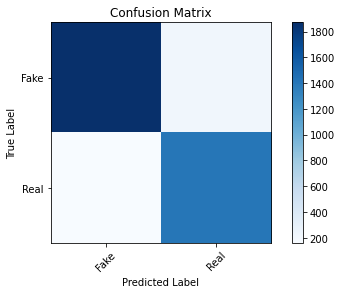

In [23]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy ",score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])

In [24]:
y_train.shape

(14628,)

In [25]:
# Passive Aggresive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

Accuracy  0.9127700300793


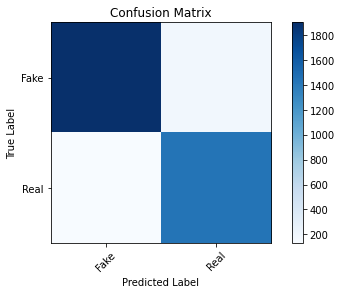

In [26]:
linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy ",score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])

# Multinomial Classifier with HyperParameter

In [27]:
classifier = MultinomialNB(alpha=0.1)
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train, y_train)
    y_pred = sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score >previous_score:
        classifier = sub_classifier
    print("Aplha {} score {}".format(alpha, score))


/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Aplha 0.0 score 0.890620727372163
Aplha 0.1 score 0.8958162428219852
Aplha 0.2 score 0.8969100355482637
Aplha 0.30000000000000004 score 0.8955427946404156
Aplha 0.4 score 0.8958162428219852
Aplha 0.5 score 0.8955427946404156
Aplha 0.6000000000000001 score 0.8955427946404156
Aplha 0.7000000000000001 score 0.895269346458846
Aplha 0.8 score 0.8947224500957068
Aplha 0.9 score 0.8958162428219852


In [28]:
# Feature names
feature_names = cv.get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
classifier.coef_[0] #The coef_ contain the coefficients for the prediction of each of the targets.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.07891813,  -8.92234907,  -9.49289393, ..., -10.959231  ,
        -8.56133573,  -9.78915975])

In [30]:
# Most real
sorted(zip(classifier.coef_[0], feature_names),reverse=True)[:20]

[(-3.947215811039949, 'trump'),
 (-4.270599584571801, 'hillari'),
 (-4.366338684679626, 'clinton'),
 (-4.840399857207457, 'elect'),
 (-5.170630911153181, 'new'),
 (-5.219438088056645, 'comment'),
 (-5.2783002410687745, 'video'),
 (-5.324838301219488, 'us'),
 (-5.361220648569926, 'war'),
 (-5.377825430246289, 'fbi'),
 (-5.407564240316567, 'hillari clinton'),
 (-5.4606975870173375, 'email'),
 (-5.521634899826555, 'vote'),
 (-5.556053243071698, 'world'),
 (-5.59169856466637, 'obama'),
 (-5.644930929181233, 'donald'),
 (-5.672648889906263, 'donald trump'),
 (-5.760733968970054, 'america'),
 (-5.773087430579715, 'russia'),
 (-5.864118401398221, 'american')]

In [31]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.95923100023588, 'abroad'),
 (-10.95923100023588, 'abus new'),
 (-10.95923100023588, 'abus new york'),
 (-10.95923100023588, 'act new'),
 (-10.95923100023588, 'act new york'),
 (-10.95923100023588, 'advic'),
 (-10.95923100023588, 'advis new'),
 (-10.95923100023588, 'advis new york'),
 (-10.95923100023588, 'age new'),
 (-10.95923100023588, 'age new york'),
 (-10.95923100023588, 'agenda breitbart'),
 (-10.95923100023588, 'ahead trump'),
 (-10.95923100023588, 'aleppo new'),
 (-10.95923100023588, 'aleppo new york'),
 (-10.95923100023588, 'ali'),
 (-10.95923100023588, 'america breitbart'),
 (-10.95923100023588, 'america new york'),
 (-10.95923100023588, 'american breitbart'),
 (-10.95923100023588, 'american new'),
 (-10.95923100023588, 'american new york'),
 (-10.95923100023588, 'ami'),
 (-10.95923100023588, 'ami schumer'),
 (-10.95923100023588, 'amp'),
 (-10.95923100023588, 'app'),
 (-10.95923100023588, 'applaud'),
 (-10.95923100023588, 'arson'),
 (-10.95923100023588, 'asian'),
 (-10.